# Grid Map Plotting Tool

In [1]:
#Setup
import numpy as np
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import pandas as pd
import os
import sys
import configparser
import codecs
import csv

mpl.rcParams['agg.path.chunksize'] = 100000
cmap = plt.cm.plasma

In [2]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

### SETTINGS

In [154]:
#csv data読み込み用
def csv_df(sensor):
    return pd.read_csv(sensor+'.csv', skiprows=1,index_col=False)

#text data読み込み用
def txt_df(sensor):   
    return pd.read_table(sensor+'.txt', header=0,index_col=False)

#text plot and fit function (simple plot)
def func(x,a,b):
    return a*x + b

def text_plot_1(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)
    df_b.groupby(['Vane','RPM corr [1/min]'])['M corr [kg/s]'].plot(legend=False, color="Blue")
    plt.title('Flow-PRT plot for ' + case)
    plt.xlabel('Pressure Ratio PRT')
    plt.ylabel('Flow rate [kg/s]')
    name = str(case)
    plt.savefig(name + '_PRT_Flow.png', dpi=300)

def text_plot_2(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('M corr [kg/s]', inplace=True)
    df_b.groupby(['RPM corr [1/min]','Vane'])['ER [ - ]'].plot(legend=False, color="Blue")
    plt.title('PRT-Flow plot for ' + case)
    plt.ylabel('Pressure Ratio PRT')
    plt.xlabel('Flow rate [kg/s]')
    name = str(case)
    plt.savefig(name + '_Flow_PRT.png', dpi=300)
    
def text_plot_3(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('M corr [kg/s]', inplace=True)   
    ydata_df = df_b.groupby(['Vane','RPM corr [1/min]'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%']) 
        col=cmap(float(key[0]))
        ydata_df.get_group(key)['eta [fraction]'].plot(legend=False,color=col)
    plt.title('Flow-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('Flow rate [kg/s]')
    name = str(case)
    plt.savefig(name + '_Flow_EtaT.png', dpi=300)
    
def text_plot_3a(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('M corr [kg/s]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%:88,000rpm']) 
        col=cmap(float(key[0])/88000)
        ydata_df.get_group(key)['eta [fraction]'].plot(legend=False,color=col)
    plt.title('flow-EtaT (rpm) plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('flow rate [kg/s]')
    name = str(case)
    plt.savefig(name + '_flowrpm_EtaT.png', dpi=300)
    
def text_plot_4(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%:88,000rpm']) 
        col=cmap(float(key[0])/88000)
        ydata_df.get_group(key)['eta [fraction]'].plot(legend=False,color=col)
    plt.title('PRT-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('ER [ - ]')
    name = str(case)
    plt.savefig(name + '_PRT_EtaT_rpm.png', dpi=300)
    
def text_plot_4a(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%']) 
        col=cmap(float(key[1]))
        ydata_df.get_group(key)['eta [fraction]'].plot(legend=False,color=col)
    plt.title('PRT-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('ER [ - ]')
    name = str(case)
    plt.savefig(name + '_PRT_EtaT_vane.png', dpi=300)
    
def text_plot_4b(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%:88,000rpm']) 
        col=cmap(float(key[0])/88000)
        ydata_df.get_group(key)['M corr [kg/s]'].plot(legend=False,color=col)
    plt.title('PRT-Flow plot for ' + case)
    plt.ylabel('Flow [kg/s]')
    plt.xlabel('PRT')
    name = str(case)
    plt.savefig(name + '_PRT_Flow_rpm.png', dpi=300)
    
def text_plot_4c(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%']) 
        col=cmap(float(key[1]))
        ydata_df.get_group(key)['M corr [kg/s]'].plot(legend=False,color=col)
    plt.title('PRT-Flow plot for ' + case)
    plt.ylabel('Flow [kg/s]')
    plt.xlabel('PRT')
    name = str(case)
    plt.savefig(name + '_PRT_Flow_vane.png', dpi=300)
    

    

def text_plot_5(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('RPM corr [1/min]', inplace=True)
    df_b.groupby('Vane')['eta [fraction]'].plot(legend=False, color="Blue")
    plt.title('rpm-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('rpm')
    name = str(case)
    plt.savefig(name + '_rpm_EtaT.png', dpi=300)
    
    

    
def text_plot_6(case):
    df_b = txt_df(case)
    clf()
    plt.figure(0)   
    df_b.set_index('RPM corr [1/min]', inplace=True)   
    ydata_df = df_b.groupby(['RPM corr [1/min]','Vane'])       
   
    for key, item in ydata_df:
        custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                        Line2D([0], [0], color=cmap(.2), lw=4),
                        Line2D([0], [0], color=cmap(.4), lw=4),
                        Line2D([0], [0], color=cmap(.6), lw=4),
                        Line2D([0], [0], color=cmap(.8), lw=4),
                        Line2D([0], [0], color=cmap(1.), lw=4)]
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%']) 
        col=cmap(float(key))
        ydata_df.get_group(key)['eta [fraction]'].plot(legend=False,color=col, style="dots")
    plt.title('rpm-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('rpm')
    name = str(case)
    plt.savefig(name + '_rpm_EtaT.png', dpi=300)

    
    
def text_plot_7(case):
    df_b = txt_df(case)
    vanepos = list()
    mapdata = list()
    mapcounts=list()
    count=0
    for g, data in df_b.groupby(['Vane','RPM corr [1/min]']):
        mapdata.append(data)
        vanepos.append(data['Vane'].iloc[0])
        mapcounts.append(count)
        count+=1
    clf()
    plt.figure(0)
    for i in mapcounts:
        xdata = mapdata[i]['ER [ - ]']
        ydata = mapdata[i]['M corr [kg/s]']
        plot(xdata,ydata,color=cmap(vanepos[i]))
    plt.title(case)
    plt.ylabel('ER')
    plt.xlabel('Flow [g/s]')
    name = str(case)
    plt.savefig(name + '_plot7.png', dpi=300)
    
    
    """ 
 fig, ax = plt.subplots()
        
        
    clf()
    plt.figure(0)   
    df_b.set_index('ER [ - ]', inplace=True)
    df_b.groupby('Vane')['eta [fraction]'].plot(legend=False)
    plt.title('PRT-EtaT plot for ' + case)
    plt.ylabel('EtaT')
    plt.xlabel('Pressure Ratio PRT')
    name = str(case)
    plt.savefig(name + '_PRT_EtaT.png', dpi=300)
    
    
    
        if float(key[0]) <0.2:
            colm="purple"
        elif float(key[0]) <0.4:
            colm="blue"
        elif float(key[0]) <0.6:
            colm="lightgreen"
        elif float(key[0]) <0.8:
            colm="yellow"
        elif float(key[0]) <1.0:
            colm="orange"
        else :
            colm="red"

    ydata_b = df_b.iloc[:,3]
    plt.plot(xdata_b, ydata_b,"blue", label='PRT-Q')   
    plt.xlabel('Pressure Ratio PRT')
    plt.ylabel('Flow rate [kg/s]')
    #plt.xticks(np.arange(0, 1.3, 0.1))
    #plt.yticks(np.arange(0, 4.25, 0.25))
    #plt.xlim([0,1.3])
    #plt.ylim([0,4.2])
    plt.title('PRT plot for ' + case)
    #plt.legend(loc="lower right")
    name = str(case)
    plt.savefig(name + '.png', dpi=300)}
    
#      df = txt_df(case)
#      plt.plot(df.iloc[:,1], df.iloc[:,0], label='all')
"""

### Plot Data

<Figure size 1080x720 with 0 Axes>

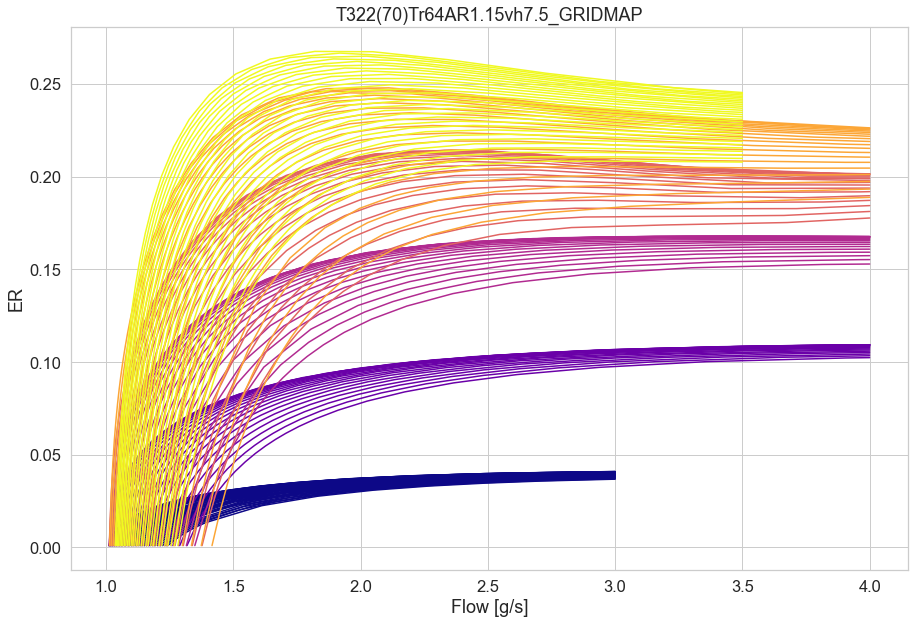

In [155]:
#text_plot_1('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_2('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_3('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_3a('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_4('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_4a('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_4b('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_4c('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
#text_plot_5('T322(70)Tr64AR1.15vh7.5_GRIDMAP')
text_plot_7('T322(70)Tr64AR1.15vh7.5_GRIDMAP')

